In [1]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_column", None)

In [16]:
titanic_data = pd.read_csv("/Users/pradeepr/Desktop/Imarticus/Logistic Regression/Kaggle /Titanic using Logistic regression/train.csv")

In [17]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
print('No of Passengers in original data : ' +str(len(titanic_data.index)))


No of Passengers in original data : 891


### Analyzing Data

Text(0.5, 1.0, 'Count plot of Survived')

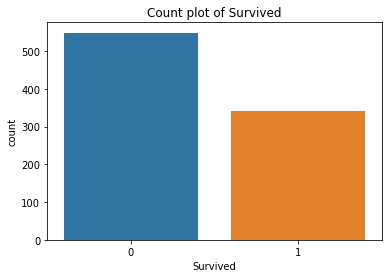

In [22]:
sns.countplot(x='Survived', data = titanic_data)
plt.title("Count plot of Survived")

Text(0.5, 1.0, 'Count plot of Survived with comparision with Sex')

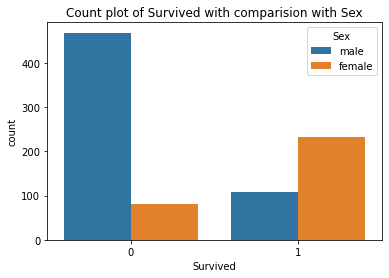

In [23]:
sns.countplot(x='Survived', hue = 'Sex',data = titanic_data)
plt.title("Count plot of Survived with comparision with Sex")

Text(0.5, 1.0, 'Count plot of Survived with comparision with Pclass')

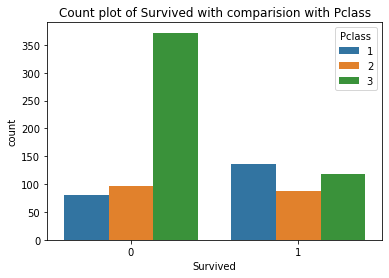

In [25]:
sns.countplot(x='Survived', hue = 'Pclass',data = titanic_data)
plt.title("Count plot of Survived with comparision with Pclass")

Text(0.5, 1.0, 'Histogram of Age')

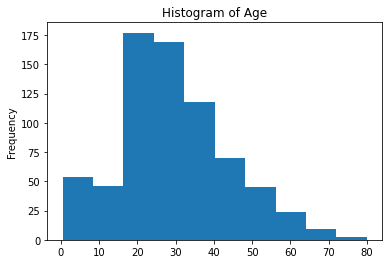

In [27]:
titanic_data['Age'].plot.hist()
plt.title("Histogram of Age")

Text(0.5, 1.0, 'Histogram of Fare')

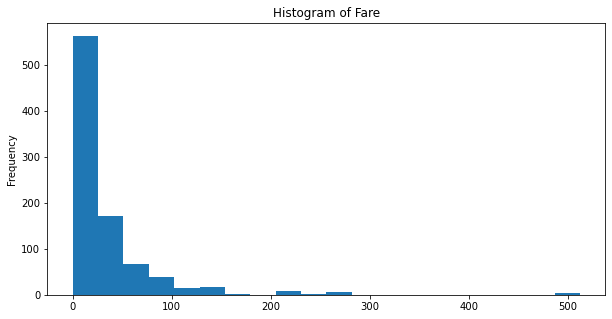

In [29]:
titanic_data['Fare'].plot.hist(bins=20, figsize =(10,5))
plt.title("Histogram of Fare")

Text(0.5, 1.0, 'Count plot of SibSp')

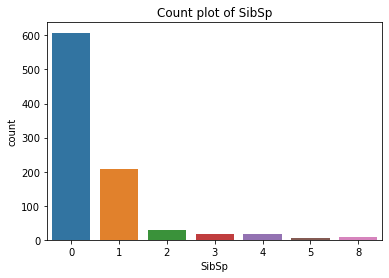

In [32]:
### sibsp column means siblings or spouse aboarded the titanic

sns.countplot(x='SibSp', data=titanic_data)
plt.title("Count plot of SibSp")

Text(0.5, 1.0, 'Count plot of Parch')

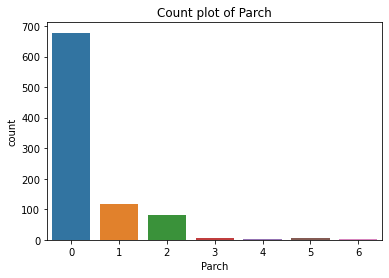

In [33]:
### Parch column means Number of parents or children aboarded the titanic

sns.countplot(x='Parch', data=titanic_data)
plt.title("Count plot of Parch") 


### Data Wrangling

In [38]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

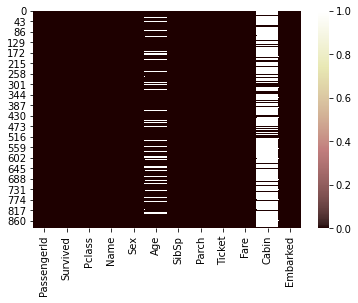

<Figure size 1080x1080 with 0 Axes>

In [43]:
sns.heatmap(pd.isnull(titanic_data), cmap='pink');
plt.figure(figsize=(15,15))
plt.show()
# This plot highlights the null values

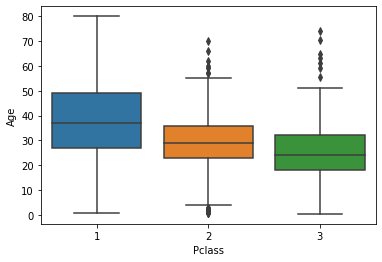

In [44]:
sns.boxplot(x='Pclass', y='Age',data=titanic_data)

In [45]:
### Droping Cabin due to huge null values
titanic_data.drop('Cabin', axis = 1, inplace=True)

In [46]:
titanic_data.dropna(inplace=True)

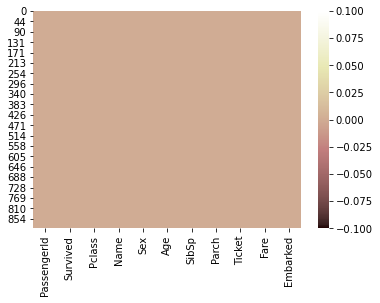

<Figure size 1080x1080 with 0 Axes>

In [47]:
sns.heatmap(pd.isnull(titanic_data), cmap='pink');
plt.figure(figsize=(15,15))
plt.show()
# This plot highlights the null values

In [48]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [ ]:
### Converting datatype
### making it dummy

In [52]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head()
### drop_first = True means only one column is enough to know sex do it will keep only one dummy column


,male
0,1
1,0
2,0
3,0
4,1


In [55]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [56]:
Pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [57]:
titanic_data=pd.concat([titanic_data, sex, embark, Pcl], axis = 1)


In [58]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [61]:
titanic_data.drop(['Sex','Embarked','Pclass','PassengerId','Name','Ticket'],axis=1, inplace=True)


In [62]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Spliting the data

In [86]:
y = titanic_data['Survived']
X= titanic_data.drop('Survived',axis=1)

In [65]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
                    


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel = LogisticRegression()

In [91]:
logmodel.fit(X_train, y_train)

/Users/amruthabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
predictions = logmodel.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

In [93]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
from sklearn.metrics import accuracy_score 

In [94]:
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 25,  63]])

In [95]:
accuracy_score(y_test, predictions)

0.7710280373831776